## Challenge 1: Measure and plot an f-I curve

- The relationship between input current (I) and output firing rate (f)
- Make sure to only count spikes within the window of the step current injection

## Challenge 2: Simultaneously optimize both somatic input resistance and the slope of the f-I curve.

- Hint: x0 = [gl0, gnabar0, gkbar0]
- How to construct a single error value that reflects 2 objectives?
- Target f-I slope should be ~10 Hz / 0.05 nA
- f-I slope should really only be calculated from values of I that produced more than one spike. ___/

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import style
from neuron import h

## Challenge 1: 

In [2]:
h.load_file('stdrun.hoc')

1.0

In [3]:
soma = h.Section()
soma.L = 20.
soma.diam = 20.
soma.insert('hh')

h.tstop = 600.
v_init = -65.
h.v_init = v_init

t = h.Vector()
soma_voltage = h.Vector()
t.record(h._ref_t, h.dt)  # record the time base
soma_voltage.record(soma(0.5)._ref_v, h.dt)  # record the voltage across the membrane in a segment

step_current_stim = h.IClamp(soma(0.5))
step_current_stim.amp = 0.15  # amplitude in nanoAmps
step_current_stim.dur = 200.  # duration in milliseconds
step_current_stim.delay = 200.  # start time of current injection
h.run()

0.0

In [4]:
'''#output firing rate = Spike_counts/ms - time constant
h.run()
plt.figure()
plt.plot(t, soma_voltage)
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (ms)')
#smaller current injection might cause all to be same height'''

"#output firing rate = Spike_counts/ms - time constant\nh.run()\nplt.figure()\nplt.plot(t, soma_voltage)\nplt.ylabel('Voltage (mV)')\nplt.xlabel('Time (ms)')\n#smaller current injection might cause all to be same height"

In [5]:
hh_mech = soma(0.5).hh
#now think of hh attributes in time scales
gl = h.Vector()
gl.record(soma(0.5).hh._ref_gl, h.dt)
gna = h.Vector()
gna.record(soma(0.5).hh._ref_gna, h.dt)
gk = h.Vector()
gk.record(soma(0.5).hh._ref_gk, h.dt)

Vector[4]

In [6]:



gkbar0 = soma(0.5).hh.gkbar

gnabar0 = soma(0.5).hh.gnabar
   
gl0 = soma(0.5).hh.gl

T0 = h.celsius

In [7]:
spike_times = h.Vector()
spike_detector = h.NetCon(soma(0.5)._ref_v, None, sec=soma)
spike_detector.delay = 0.  # ms
spike_detector.threshold = -10.  # mV
spike_detector.record(spike_times)

0.0

In [8]:
'''step_current_stim.amp = 0.5
test_amp_vals = [0.05 * i for i in range(6)]
fig, axes = plt.subplots(len(test_amp_vals))
for i, amp in enumerate(test_amp_vals):
    step_current_stim.amp = amp
    h.run()
    print('Amp: %.2f;\nspike times: %s' % (amp, str(np.array(spike_times))))
    axes[i].plot(t, soma_voltage, label='Amp: %.2f;\nspike count: %i' % (amp, len(spike_times)))
    axes[i].legend(loc='best', frameon=False)
fig.show()'''

"step_current_stim.amp = 0.5\ntest_amp_vals = [0.05 * i for i in range(6)]\nfig, axes = plt.subplots(len(test_amp_vals))\nfor i, amp in enumerate(test_amp_vals):\n    step_current_stim.amp = amp\n    h.run()\n    print('Amp: %.2f;\nspike times: %s' % (amp, str(np.array(spike_times))))\n    axes[i].plot(t, soma_voltage, label='Amp: %.2f;\nspike count: %i' % (amp, len(spike_times)))\n    axes[i].legend(loc='best', frameon=False)\nfig.show()"

In [9]:
step_current_stim.amp = 0.50
#To produce the a Depolarization Block:
#current_amps = [0.050 * i for i in range(35)]
#No Depolarization block: 0.05-0.6nA
current_amps = [0.050 * i for i in range(13)]
#create a firing_rate list
firing_rate_list = []
#create a list for spike_times contained within a array that is being created from enumerating through a list of
#input x values or current inputs
spike_count_list = []
#pass in the values of current inputs as x
def calc_firing_rates(current_amps):
    #enumerate throught these x values: for count(i), values(amp) in enumerate through x
     for i, amp in enumerate(current_amps):
    #for i, amp in enumerate(test_amp_vals):
    #assign the .amp object to the amp value variable
        step_current_stim.amp = amp
        #needs to run to make the simulation happe
        h.run()
        #firing rate = the array of the length of the array of spike times - has to be the length because 
        #the spike times will tell u where a spike happens at what time point, so each time point, if it reaches
        #threshold it will become a spike, this is divided by the simulations current duration - which is the interval
        #where spikes will occur at because this is where current is being stimulated / 1000 (ms to s)
        firing_rate = np.array((len(np.array(spike_times))/(step_current_stim.dur/1000)))
        #must print within the function to output this value when you return the function
        print(firing_rate)
        #print(len(np.array(spike_times))) 
        #append the firing rate values to the firing rate list so u can have them stored
        firing_rate_list.append(float(firing_rate)) 
        #do the same for the spike time length or spikes
        spike_count_list.append(len(np.array(spike_times)))

In [10]:
current_amps

[0.0,
 0.05,
 0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.30000000000000004,
 0.35000000000000003,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6000000000000001]

In [11]:
calc_firing_rates(current_amps)

0.0
5.0
65.0
75.0
80.0
90.0
95.0
100.0
100.0
105.0
110.0
115.0
115.0


In [12]:
len(firing_rate_list)

13

In [13]:
#len(firing_rate_list)

In [14]:
#spike_count_list

In [26]:
'''plt.plot(current_amps, firing_rate_list) 
plt.xlabel('Input Current (nA)')
plt.ylabel('Firing Rate (Spikes/S)')
plt.title('F-I Curve')
#plt.savefig('F-I Curve.png')'''

"plt.plot(current_amps, firing_rate_list) \nplt.xlabel('Input Current (nA)')\nplt.ylabel('Firing Rate (Spikes/S)')\nplt.title('F-I Curve')\n#plt.savefig('F-I Curve.png')"

In [16]:
'''step_current_stim.amp = 0.5
test_amp_vals = [0.05 * i for i in range(40)]
fig, axes = plt.subplots(len(test_amp_vals), figsize=(9., 80.))
for i, amp in enumerate(test_amp_vals):
    step_current_stim.amp = amp
    h.run()
    print('Amp: %.2f;\nspike times: %s' % (amp, str(np.array(spike_times))))
    axes[i].plot(t, soma_voltage, label='Amp: %.2f;\nspike count: %i' % (amp, len(spike_times)))
    axes[i].legend(loc='best', frameon=False)
fig.show()'''

"step_current_stim.amp = 0.5\ntest_amp_vals = [0.05 * i for i in range(40)]\nfig, axes = plt.subplots(len(test_amp_vals), figsize=(9., 80.))\nfor i, amp in enumerate(test_amp_vals):\n    step_current_stim.amp = amp\n    h.run()\n    print('Amp: %.2f;\nspike times: %s' % (amp, str(np.array(spike_times))))\n    axes[i].plot(t, soma_voltage, label='Amp: %.2f;\nspike count: %i' % (amp, len(spike_times)))\n    axes[i].legend(loc='best', frameon=False)\nfig.show()"

## Challenge 2: 

In [17]:
from statistics import mean
#f-I slope should really only be calculated from values of I that produced more than one spike. ___/

In [18]:
#0.1 - 1.3 = x1[2:26] - produce more than one spike
current_amps_new = current_amps[2:27]

In [19]:
len(current_amps_new )

11

In [20]:
above_one_spike_list = []
for i in firing_rate_list:
        if i > 5:
            above_one_spike = i 
            #print(above_one_spike)
            above_one_spike_list.append(above_one_spike)

In [21]:
above_one_spike_list

[65.0, 75.0, 80.0, 90.0, 95.0, 100.0, 100.0, 105.0, 110.0, 115.0, 115.0]

<IPython.core.display.Javascript object>


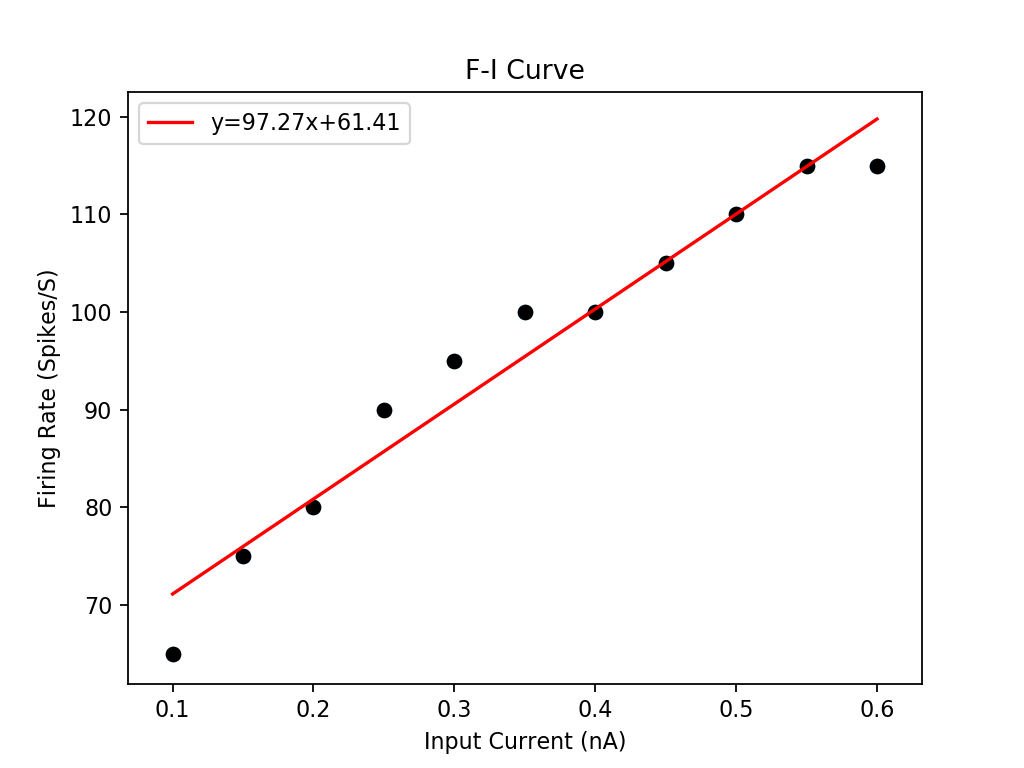

Text(0.5, 1.0, 'above one spike F-I Curve')

In [27]:
plt.scatter(current_amps_new , above_one_spike_list) 
plt.xlabel('Input Current (nA)')
plt.ylabel('Firing Rate (Spikes/S)')
plt.title('above one spike F-I Curve')

### Slope of F-I curve

In [28]:
xs = np.array(current_amps_new, dtype=np.float64)
ys = np.array(above_one_spike_list, dtype=np.float64)

def best_fit_slope(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs**2)))
    return m

m = best_fit_slope(xs,ys)
print(m)

97.27272727272722


In [29]:
best_fit_slope(xs,ys)

97.27272727272722

In [30]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

97.27272727272722 61.40909090909092


In [31]:
best_fit_slope_and_intercept(xs,ys)

(97.27272727272722, 61.40909090909092)

In [32]:
regression_line = [(m*x)+b for x in xs]

In [33]:
regression_line

[71.13636363636364,
 76.0,
 80.86363636363637,
 85.72727272727272,
 90.5909090909091,
 95.45454545454545,
 100.31818181818181,
 105.18181818181817,
 110.04545454545453,
 114.9090909090909,
 119.77272727272727]

In [34]:
plt.scatter(xs,ys, c = 'k')
plt.xlabel('Input Current (nA)')
plt.ylabel('Firing Rate (Spikes/S)')
plt.title('F-I Curve')
plt.plot(xs, regression_line, c = 'r', label = 'y={:.2f}x+{:.2f}'.format(m,b))
plt.legend(fontsize=10)
plt.show()

### Optimize Functions

In [47]:
xs = np.array(current_amps_new, dtype=np.float64)
ys = np.array(above_one_spike_list, dtype=np.float64)

def best_fit_slope(xs,ys):
    FI_slope = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs**2)))
    return FI_slope

#FI_slope = best_fit_slope(xs,ys)
#print(FI_slope)

In [48]:
#best_fit_slope(xs,ys)

97.27272727272722

In [74]:
def get_R_inp(t, v, i_amp, baseline_window=(195., 200.),  measurement_window=(395., 400.)):
    baseline_indexes = np.where((baseline_window[0] <= t) & (t < baseline_window[1]))
    measurement_indexes = np.where((measurement_window[0] <= t) & (t < measurement_window[1]))
    baseline_v = np.mean(v[baseline_indexes])
    measurement_v = np.mean(v[measurement_indexes])
    delta_v = abs(baseline_v - measurement_v)
    R_inp = (delta_v / 1000.) / (abs(i_amp) / 1e9) / 1e6 # convert mV to V, nA to A, and Ohm to MegaOhm
    return R_inp

In [75]:
t_array = np.array(t)
v_array = np.array(soma_voltage)
i_amp = step_current_stim.amp

get_R_inp(t_array, v_array, i_amp, baseline_window=(195., 200.),  measurement_window=(395., 400.))

7.647349295201367

In [ ]:
#How to construct a single error value that reflects 2 objectives?

In [ ]:
#?????????

In [66]:
#Hint: x0 = [gl0, gnabar0, gkbar0]

def get_R_inp(t, v, i_amp, baseline_window=(195., 200.),  measurement_window=(395., 400.)):
    baseline_indexes = np.where((baseline_window[0] <= t) & (t < baseline_window[1]))
    measurement_indexes = np.where((measurement_window[0] <= t) & (t < measurement_window[1]))
    baseline_v = np.mean(v[baseline_indexes])
    measurement_v = np.mean(v[measurement_indexes])
    delta_v = abs(baseline_v - measurement_v)
    R_inp = (delta_v / 1000.) / (abs(i_amp) / 1e9) / 1e6 # convert mV to V, nA to A, and Ohm to MegaOhm
    return R_inp

def multi_objective_error(x, target, bounds, sim_history):
    for xi, bi in zip(x, bounds):
        if not bi[0] <= xi <= bi[1]:
            return 1e9
    #soma(0.5).pas.g = x[0]
    #h.run()
    t_array = np.array(t)
    v_array = np.array(soma_voltage)
    i_amp = step_current_stim.amp
    soma_R_inp = get_R_inp(t_array, v_array, i_amp)
    FI_slope = best_fit_slope(xs,ys)
    #square of the difference between measured and target
    error = (target - FI_slope) ** 2.
    #key value pairs t.... soma Vm
    this_sim_summary = {}
    this_sim_summary['t'] = t_array
    this_sim_summary['soma_voltage'] = v_array
    this_sim_summary['soma_R_inp'] = soma_R_inp
    this_sim_summary['FI_slope'] = FI_slope
    this_sim_summary['error'] = error
    #x as a tuple to use as a key
    #good for querying too, take query and convert to tuple
    #to check if query is done before
    #good for finding specific synapse at an area and cash these know that this copy is cashed to pull again
    #cash - search history - save pointer to result if serialized 
    sim_history[tuple(x)] = this_sim_summary
    #squared error
    return error

In [62]:
from scipy.optimize import basinhopping

In [63]:
bounds = ((1e-12, 0.9),)
stepsize = 0.5 * (bounds[0][1] - bounds[0][0])
x0 = [gl0, gnabar0, gkbar0]
target_FI_slope = 200. 
#store t array, soma Vm, outcome of Rinp and error function float into dict
#per x0 input its associated with its own keys and values of simulations
#to know the values passed in for the x0, but cannot use an iterable value, have to convert array into tuple
sim_history = {} # {x0: {'t': array, 'soma_voltage': array, 'soma_R_inp': float, 'error': float}

result = basinhopping(multi_objective_error, x0, stepsize=stepsize, disp=True, 
                     minimizer_kwargs={'method': 'Nelder-Mead', 'args': (target_FI_slope, bounds, sim_history)})

basinhopping step 0: f 10552.9
basinhopping step 1: f 10552.9 trial_f 10552.9 accepted 1  lowest_f 10552.9
basinhopping step 2: f 10552.9 trial_f 10552.9 accepted 1  lowest_f 10552.9
basinhopping step 3: f 10552.9 trial_f 10552.9 accepted 1  lowest_f 10552.9
basinhopping step 4: f 10552.9 trial_f 10552.9 accepted 1  lowest_f 10552.9
basinhopping step 5: f 10552.9 trial_f 10552.9 accepted 1  lowest_f 10552.9
basinhopping step 6: f 10552.9 trial_f 10552.9 accepted 1  lowest_f 10552.9
basinhopping step 7: f 10552.9 trial_f 1e+09 accepted 0  lowest_f 10552.9
basinhopping step 8: f 10552.9 trial_f 10552.9 accepted 1  lowest_f 10552.9
basinhopping step 9: f 10552.9 trial_f 10552.9 accepted 1  lowest_f 10552.9
basinhopping step 10: f 10552.9 trial_f 10552.9 accepted 1  lowest_f 10552.9
basinhopping step 11: f 10552.9 trial_f 10552.9 accepted 1  lowest_f 10552.9
basinhopping step 12: f 10552.9 trial_f 1e+09 accepted 0  lowest_f 10552.9
basinhopping step 13: f 10552.9 trial_f 1e+09 accepted 0  

In [64]:
print(result)

                        fun: 10552.89256198348
 lowest_optimization_result:  final_simplex: (array([[0.0003    , 0.12      , 0.036     ],
       [0.00030023, 0.12      , 0.036     ],
       [0.0003    , 0.12009375, 0.036     ],
       [0.0003    , 0.12      , 0.03602812]]), array([10552.89256198, 10552.89256198, 10552.89256198, 10552.89256198]))
           fun: 10552.89256198348
       message: 'Optimization terminated successfully.'
          nfev: 34
           nit: 7
        status: 0
       success: True
             x: array([0.0003, 0.12  , 0.036 ])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 5139
                        nit: 100
                          x: array([0.0003, 0.12  , 0.036 ])


In [ ]:
#How to construct a single error value that reflects 2 objectives?
#Target f-I slope should be ~10 Hz / 0.05 nA